# JSON and APIs

_November 3, 2020_

Agenda today:
- Introduction to API and Remote Server Model 
- Getting data through an API: Case study with YELP API

In [1]:
import pandas as pd
import numpy as np
import requests
import json
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Part I. APIs and Remote Server Model
API stands for Application Programming Interface. At some point or the other, large companies would build API for their products for their clients or internal use. It allows the company's application to communicate with another application. But what _exactly_ is an API?

#### Remote server 
When we think about the world of Web, we can think of it as a collection of _servers_. And servers are nothing but huge computers that store a huge amount of data from users and are optimized to process requests. For example, when you type in www.facebook.com, your browser sends a _request_ to the Facebook server, and gets a response from the server, thus interpreting the code and displaying your homepage. 

In this case, your browser is the _client_, and Facebook’s server is an API. To put it broadly, whenever you visit a website, you are interacting with its API. However, an API isn’t the same as the remote server — rather it is the part of the server that receives __requests__ and sends __responses__.

<img src='status-code.png' width = 500>

## Part II. Getting Data Through APIs

The `get()` method send a request to YELP's API, and stored information in a variable called `request`. Next, let's see if it's successful. 

#### YELP API
Sometimes you need _authentication_ to get data from a service in additional to just sending a `GET()` request. Yelp API is a perfect example. 

You will need to go to the YELP's developer's [website](https://www.yelp.com/developers/v3/manage_app) and request for a client ID and API key, which function like a key into a house of data. 

<img src='yelp.png' width = 500>

In [2]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3/businesses/search'
response = requests.get(url)

In [3]:
# check the status code
response.status_code

# what happened here?

400

In [14]:
# now we are ready to get our data 

# usually, services would limit you to a certain amount of API calls. This varies from service
# to service, so you have to watch out to it 

MY_API_KEY = "xqkU-9rqBW_WPJhC7rquvKSXBju4oe7DgsHCoP27DUQyK2u-df-BVTe9kuVdu-n2HKxq4LThRItpbGXBMDXcmcuN-KstqlAIaLdcZ0470fEJybl11JosOhqWHDiiX3Yx"


term = 'Axe Throwing'
location = 'Brooklyn'
SEARCH_LIMIT = 30

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)

In [15]:
response.status_code

200

In [17]:
# how are we going to parse the response.text object?

response.text

'{"businesses": [{"id": "X0DNGKUQPjf0AfaXfXU2Qg", "alias": "kick-axe-throwing-brooklyn-2", "name": "Kick Axe Throwing", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/WjKylwrUBKnGIE_ldj142Q/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/kick-axe-throwing-brooklyn-2?adjust_creative=dNuy2Wnm1T8-hrTaweTS5g&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=dNuy2Wnm1T8-hrTaweTS5g", "review_count": 403, "categories": [{"alias": "bars", "title": "Bars"}, {"alias": "axethrowing", "title": "Axe Throwing"}, {"alias": "tradamerican", "title": "American (Traditional)"}], "rating": 4.5, "coordinates": {"latitude": 40.6790268, "longitude": -73.983077}, "transactions": [], "location": {"address1": "622 Degraw St", "address2": null, "address3": "", "city": "Brooklyn", "zip_code": "11217", "country": "US", "state": "NY", "display_address": ["622 Degraw St", "Brooklyn, NY 11217"]}, "phone": "+18335425293", "display_phone": "(833) 542-5293", "distance": 4733.61662

In [18]:
# json.load()
#^^takes in json file, spits out python dict
# json.loads()
#^^takes in string, spits out python dict (loadS--> S = string)
json.loads(response.text)
#^^gives dictionary instead of string from above

{'businesses': [{'id': 'X0DNGKUQPjf0AfaXfXU2Qg',
   'alias': 'kick-axe-throwing-brooklyn-2',
   'name': 'Kick Axe Throwing',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/WjKylwrUBKnGIE_ldj142Q/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/kick-axe-throwing-brooklyn-2?adjust_creative=dNuy2Wnm1T8-hrTaweTS5g&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=dNuy2Wnm1T8-hrTaweTS5g',
   'review_count': 403,
   'categories': [{'alias': 'bars', 'title': 'Bars'},
    {'alias': 'axethrowing', 'title': 'Axe Throwing'},
    {'alias': 'tradamerican', 'title': 'American (Traditional)'}],
   'rating': 4.5,
   'coordinates': {'latitude': 40.6790268, 'longitude': -73.983077},
   'transactions': [],
   'location': {'address1': '622 Degraw St',
    'address2': None,
    'address3': '',
    'city': 'Brooklyn',
    'zip_code': '11217',
    'country': 'US',
    'state': 'NY',
    'display_address': ['622 Degraw St', 'Brooklyn, NY 11217']},
   'phone': '+

In [19]:
# working with JSON

axe_throwing = response.text
axe_throwing = json.loads(axe_throwing)

In [20]:
axe_throwing

{'businesses': [{'id': 'X0DNGKUQPjf0AfaXfXU2Qg',
   'alias': 'kick-axe-throwing-brooklyn-2',
   'name': 'Kick Axe Throwing',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/WjKylwrUBKnGIE_ldj142Q/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/kick-axe-throwing-brooklyn-2?adjust_creative=dNuy2Wnm1T8-hrTaweTS5g&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=dNuy2Wnm1T8-hrTaweTS5g',
   'review_count': 403,
   'categories': [{'alias': 'bars', 'title': 'Bars'},
    {'alias': 'axethrowing', 'title': 'Axe Throwing'},
    {'alias': 'tradamerican', 'title': 'American (Traditional)'}],
   'rating': 4.5,
   'coordinates': {'latitude': 40.6790268, 'longitude': -73.983077},
   'transactions': [],
   'location': {'address1': '622 Degraw St',
    'address2': None,
    'address3': '',
    'city': 'Brooklyn',
    'zip_code': '11217',
    'country': 'US',
    'state': 'NY',
    'display_address': ['622 Degraw St', 'Brooklyn, NY 11217']},
   'phone': '+

In [21]:
# cleaning and exploring the data
for key in axe_throwing.keys():
    print(key)

businesses
total
region


In [23]:
# explore which objects in the dataframe we need
axe_throwing['region']

{'center': {'longitude': -73.93936157226562, 'latitude': 40.652330148320374}}

In [37]:
# let's turn the things we need into a pandas dataframe
axethrowing_df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance
0,X0DNGKUQPjf0AfaXfXU2Qg,kick-axe-throwing-brooklyn-2,Kick Axe Throwing,https://s3-media1.fl.yelpcdn.com/bphoto/WjKylw...,False,https://www.yelp.com/biz/kick-axe-throwing-bro...,403,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.5,"{'latitude': 40.6790268, 'longitude': -73.983077}",[],"{'address1': '622 Degraw St', 'address2': None...",+18335425293,(833) 542-5293,4733.616620
1,4E6BkrEVf_0TjRVYE7gxeQ,bury-the-hatchet-brooklyn-axe-throwing-brooklyn-2,Bury the Hatchet Brooklyn - Axe Throwing,https://s3-media3.fl.yelpcdn.com/bphoto/SH8_Nw...,False,https://www.yelp.com/biz/bury-the-hatchet-broo...,155,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...",4.5,"{'latitude': 40.7283195, 'longitude': -73.9600...",[],"{'address1': '25 Noble St', 'address2': None, ...",+19172439696,(917) 243-9696,8652.979400
2,PhEkSzYZHKYS7uyXePmkMw,axes-and-arrows-long-island-city-2,Axes And Arrows,https://s3-media4.fl.yelpcdn.com/bphoto/Uinh_o...,False,https://www.yelp.com/biz/axes-and-arrows-long-...,49,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...",4.5,"{'latitude': 40.7425127, 'longitude': -73.933816}",[],"{'address1': '47- 11 Van Dam St', 'address2': ...",+17183619152,(718) 361-9152,9996.588059
3,4sPiNeQGD8mzt9ess7xZrQ,mad-axe-brooklyn,Mad Axe,https://s3-media4.fl.yelpcdn.com/bphoto/UOC-Bs...,False,https://www.yelp.com/biz/mad-axe-brooklyn?adju...,13,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...",5.0,"{'latitude': 40.707, 'longitude': -73.93364}",[],"{'address1': '94 Bogart Street 2nd', 'address2...",+19292950229,(929) 295-0229,6101.731538
4,lZVE27r_W_3GXxNwECYC4g,live-axe-new-york,Live Axe,https://s3-media2.fl.yelpcdn.com/bphoto/-Z1qvn...,False,https://www.yelp.com/biz/live-axe-new-york?adj...,6,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...",4.5,"{'latitude': 40.71769, 'longitude': -74.00144}",[],"{'address1': '96 Lafayette St', 'address2': No...",+18888129060,(888) 812-9060,8955.976102
5,b9DAbR-1eIfLr6TPI_r59Q,axe-kicking-entertainment-mineola,Axe Kicking Entertainment,https://s3-media2.fl.yelpcdn.com/bphoto/bBooTB...,False,https://www.yelp.com/biz/axe-kicking-entertain...,7,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...",5.0,"{'latitude': 40.74638, 'longitude': -73.65027}",[],"{'address1': '360 Jericho Turnpike', 'address2...",+15162806040,(516) 280-6040,26518.825160
6,Ub7igTH4-w5haq_bHmvFjQ,hatchets-and-hops-brooklyn,Hatchets & Hops,https://s3-media2.fl.yelpcdn.com/bphoto/XfyHGd...,False,https://www.yelp.com/biz/hatchets-and-hops-bro...,1,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...",5.0,"{'latitude': 40.721237, 'longitude': -73.957603}",[],"{'address1': '98 North 11th St', 'address2': N...",+18559512973,(855) 951-2973,7814.584675
7,K_Jm8V-XuOFlbHb_VUzk-w,indoor-extreme-sports-long-island-city,Indoor Extreme Sports,https://s3-media2.fl.yelpcdn.com/bphoto/wQE-gO...,False,https://www.yelp.com/biz/indoor-extreme-sports...,509,"[{'alias': 'paintball', 'title': 'Paintball'},...",4.0,"{'latitude': 40.7422746, 'longitude': -73.9338...",[],"{'address1': '47 11 Van Dam St', 'address2': N...",+17183619152,(718) 361-9152,10012.024588
8,yXOjBSwyqOKDY7oHx3z7HA,tomahawks-jersey-city,Tomahawks,https://s3-media1.fl.yelpcdn.com/bphoto/AcR-Ex...,False,https://www.yelp.com/biz/tomahawks-jersey-city...,14,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...",4.5,"{'latitude': 40.7411216, 'longitude': -74.0493...",[],"{'address1': '7 Sherman Ave', 'address2': 'Fl ...",+12014209722,(201) 420-9722,13556.031401
9,wuy6jyi5cxm1pwnUTWyBLw,stumpys-hatchet-house-fairfield-fairfield-3,Stumpy's Hatchet House - Fairfield,https://s3-media1.fl.yelpcdn.com/bphoto/yKG858...,False,https://www.yelp.com/biz/stumpys-hatchet-house...,45,"[{'alias': 'axethrowing', 'title': 'Axe Throwi...",5.0,"{'latitude': 40.882466, 'longitude': -74.29420...",[],"{'address1': '373 US-46 W', 'address2': 'Ste D...",+19737213120,(973) 721-3120,39

Text(0.5, 1.0, 'review count of axe throwing in brooklyn')

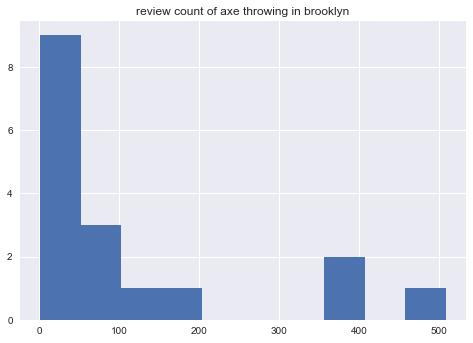

In [25]:
# you can do some analysis and visualization from here on! 

# visualize the review count - what's the appropriate plot?
plt.hist(axethrowing_df['review_count']);
plt.title('review count of axe throwing in brooklyn')

In [26]:
# query the name of the axe throwing place with the highest review
axethrowing_df = pd.DataFrame(axe_throwing['businesses'])
#axethrowing_df.head()
axethrowing_df.to_csv('axethrowing_info')

In [ ]:
# migrate the cleaned data into a sql db

In [27]:
# can you do some other queries using sql/pandas?
MY_API_KEY = "xqkU-9rqBW_WPJhC7rquvKSXBju4oe7DgsHCoP27DUQyK2u-df-BVTe9kuVdu-n2HKxq4LThRItpbGXBMDXcmcuN-KstqlAIaLdcZ0470fEJybl11JosOhqWHDiiX3Yx"


term = 'Museum'
location = 'Manhattan'
SEARCH_LIMIT = 30

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)

In [28]:
response.status_code

200

In [29]:
type(response)

requests.models.Response

In [32]:
museums = json.loads(response.text)

In [33]:
for key in museums.keys():
    print(key)

businesses
total
region


In [45]:
museums_df = pd.DataFrame(museums['businesses'])
museums_df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,mjq_dOmCPBBLAnq7PJG9-Q,spyscape-new-york,Spyscape,https://s3-media2.fl.yelpcdn.com/bphoto/1jZ6TW...,False,https://www.yelp.com/biz/spyscape-new-york?adj...,259,"[{'alias': 'museums', 'title': 'Museums'}]",4.5,"{'latitude': 40.765436, 'longitude': -73.983925}",[],"{'address1': '928 8th Ave', 'address2': None, ...",+12125491941,(212) 549-1941,738.766687,NaN
1,jVncyqXwlx_D9f2xZn05tg,the-metropolitan-museum-of-art-new-york-3,The Metropolitan Museum of Art,https://s3-media3.fl.yelpcdn.com/bphoto/oqhwmy...,False,https://www.yelp.com/biz/the-metropolitan-muse...,2906,"[{'alias': 'artmuseums', 'title': 'Art Museums'}]",4.5,"{'latitude': 40.779449, 'longitude': -73.963245}",[],"{'address1': '1000 5th Ave', 'address2': '', '...",+12125357710,(212) 535-7710,2494.912991,NaN
2,FCt4zU9tPAewEnEniRRLbg,color-factory-new-york,Color Factory,https://s3-media3.fl.yelpcdn.com/bphoto/Snj_GK...,False,https://www.yelp.com/biz/color-factory-new-yor...,420,"[{'alias': 'artmuseums', 'title': 'Art Museums'}]",4.0,"{'latitude': 40.7257668, 'longitude': -74.0053...",[],"{'address1': '251 Spring St', 'address2': '', ...",,,4449.152300,NaN
3,OUPyV2WKYETuprScXSAtuA,the-museum-of-modern-art-new-york-3,The Museum of Modern Art,https://s3-media4.fl.yelpcdn.com/bphoto/FwsEEy...,False,https://www.yelp.com/biz/the-museum-of-modern-...,1991,"[{'alias': 'artmuseums', 'title': 'Art Museums'}]",4.5,"{'latitude': 40.761441, 'longitude': -73.977625}",[],"{'address1': '11 West 53rd St', 'address2': ''...",+12127089400,(212) 708-9400,154.992760,NaN
4,IH0vUeLREFC1D_TuNXge5w,american-museum-of-natural-history-new-york-7,American Museum of Natural History,https://s3-media2.fl.yelpcdn.com/bphoto/N98scN...,False,https://www.yelp.com/biz/american-museum-of-na...,2083,"[{'alias': 'museums', 'title': 'Museums'}]",4.0,"{'latitude': 40.781356, 'longitude': -73.974059}",[],"{'address1': '200 Central Park W', 'address2':...",+12127695100,(212) 769-5100,2373.655058,NaN
5,uVOgbsNrcVRip7uBaCWhBA,whitney-museum-of-american-art-new-york-4,Whitney Museum of American Art,https://s3-media3.fl.yelpcdn.com/bphoto/4nR4dk...,False,https://www.yelp.com/biz/whitney-museum-of-ame...,492,"[{'alias': 'artmuseums', 'title': 'Art Museums'}]",4.0,"{'latitude': 40.7396059, 'longitude': -74.0089...",[],"{'address1': '99 Gansevoort St', 'address2': '...",+12125703600,(212) 570-3600,3440.937539,NaN
6,jv0Gu4wXNuyaoJMBOXqfVQ,guggenheim-museum-new-york,Guggenheim Museum,https://s3-media1.fl.yelpcdn.com/bphoto/CafLAi...,False,https://www.yelp.com/biz/guggenheim-museum-new...,998,"[{'alias': 'museums', 'title': 'Museums'}]",3.5,"{'latitude': 40.78301, 'longitude': -73.95912}",[],"{'address1': '1071 5th Ave', 'address2': '', '...",+12124233500,(212) 423-3500,3045.065790,NaN
7,IN-oJW5-9mwPEG491xWIsQ,museum-of-the-city-of-new-york-new-york,Museum of the City of New York,https://s3-media2.fl.yelpcdn.com/bphoto/tlEdFR...,False,https://www.yelp.com/biz/museum-of-the-city-of...,254,"[{'alias': 'museums', 'title': 'Museums'}, {'a...",4.0,"{'latitude': 40.79251, 'longitude': -73.95192}",[],"{'address1': '1220 5th Ave', 'address2': None,...",+12125341672,(212) 534-1672,4233.971972,NaN
8,u_oSb3fmgcVgBDXXUINAyQ,museum-of-illusions-new-york-2,Museum of Illusions,https://s3-media1.fl.yelpcdn.com/bphoto/4R0mDT...,False,https://www.yelp.com/biz/museum-of-illusions-n...,254,"[{'alias': 'museums', 'title': 'Museums'}]",3.0,"{'latitude': 40.739715, 'longitude': -74.0029843}",[],"{'address1': '77 Eighth Ave', 'address2': None...",+12126453230,(212) 645-3230,3074.051351,NaN
9,1FgUXp_ZwBbdoeiIgGw_0w,rubin-museum-of-art-new-york,Rubin Museum of Art,https://s3-media2.fl.yelpcdn.com/bphoto/YxBKxZ...,False,https://www.yelp.com/biz/rubin-museum-of-art-n...,268,"[{'alias': 'artmuseums', 'title': 'Art Museums...",4.5,"{'latitude': 40.74013, 'longitude': -73.99772}",[],"{'address1': '150 W 17th St', 'add

In [47]:
museums_df.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'location',
       'phone', 'display_phone', 'distance', 'price'],
      dtype='object')

Text(0, 0.5, 'Frequency')

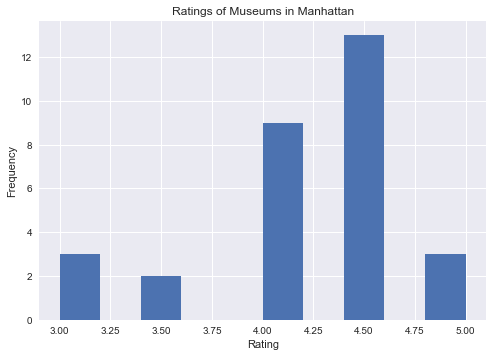

In [50]:
plt.hist(museums_df['rating']);
plt.title('Ratings of Museums in Manhattan')
plt.xlabel('Rating')
plt.ylabel('Frequency')

#### Resources
- [Getting Data from Reddit API](https://www.storybench.org/how-to-scrape-reddit-with-python/)
- [Twitch API](https://dev.twitch.tv/docs)